In [1]:
# !!! This section explains why we should not compare two sentences with these methods. !!! 
# It is not efficient to compare two sentences in Turkish.
# Word count based cosine similarity

import numpy as np

def sentence_to_word_dict(sentence):
    """
    This function takes a sentence as input and returns a dictionary with words as keys and their counts as values.
    
    Args:
        sentence: A string.
    
    Returns:
        A dictionary.
    """
    words = sentence.split()
    word_dict = {}
    for word in words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

sentence_1 = "C'nin dikkat ve özen yükümlülüğüne aykırı davranmış olması nedeniyle kusurlu olduğu değerlendirilemez."
sentence_2 = "C'nin dikkat ve özen yükümlülüğüne aykırı davranmış olması nedeniyle kusurlu olduğu değerlendirilebilir."

dict_1 = sentence_to_word_dict(sentence_1)
dict_2 = sentence_to_word_dict(sentence_2)

word_space = np.unique(list(dict_1.keys()) + list(dict_2.keys()))

# One-hot encoding
binary_vector_1 = [1 if word in dict_1 else 0 for word in word_space]
binary_vector_2 = [1 if word in dict_2 else 0 for word in word_space]

print(binary_vector_1)
print(binary_vector_2)

cosine_similarity = np.dot(binary_vector_1, binary_vector_2) / (np.linalg.norm(binary_vector_1) * np.linalg.norm(binary_vector_2))
print("Cosine similarity (%) :", cosine_similarity * 100)


# TF-IDF based cosine similarity
# Not an efficient way
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

texts = [sentence_1,sentence_2]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)
similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
print(similarity)


# Levenshtein distance
def levenshtein_distance(s1, s2):
    len_s1, len_s2 = len(s1) + 1, len(s2) + 1
    dp = np.zeros((len_s1, len_s2))
    for i in range(len_s1):
        dp[i][0] = i
    for j in range(len_s2):
        dp[0][j] = j

    for i in range(1, len_s1):
        for j in range(1, len_s2):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            dp[i][j] = min(dp[i-1][j] + 1, dp[i][j-1] + 1, dp[i-1][j-1] + cost)

    return dp[-1][-1]


print(levenshtein_distance(sentence_1, sentence_2))

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Cosine similarity (%) : 91.66666666666669
0.8477624970048978
5.0


In [2]:
# Load the model Turkish word2vec model
from gensim.models import Word2Vec
from tabulate import tabulate

model = Word2Vec.load("utils/word2vec/w2v_.model")
print(tabulate(model.wv.most_similar("mahkeme"), headers=["Kelime", "Benzerlik Skoru"]))
print("\nWord Vector:", model.wv.get_vector("umut"))

Kelime        Benzerlik Skoru
----------  -----------------
Mahkeme              0.860295
mahkemenin           0.813442
davanın              0.806494
tutuklama            0.799902
soruşturma           0.791518
temyiz               0.771838
mahkemede            0.771153
dava                 0.770335
yargılama            0.769724
savcılık             0.730116

Word Vector: [ 0.1495104  -1.4914255  -0.50925356 -0.9685314   2.1551907   0.10626572
  0.4027821   1.0281931   0.41044936 -1.1525857  -0.0205108   1.0924134
 -1.9218051   1.3797586  -0.63527036 -0.38006008 -0.6512365  -0.96633595
  1.1853794   0.7896848  -0.03258616  0.8834496  -1.6903982   0.9449919
  0.6057014   0.59224516 -1.0036951   2.0536163  -2.1637177  -0.65654767
  1.0522053   0.11371119  1.1112392  -0.43076926  0.13155091 -1.1467836
 -0.8198967   1.1959015  -0.5887494  -1.0079744  -0.25314665  0.5018188
 -0.76072204 -0.30214065 -0.13227591  0.6748753   0.7053673   1.5428567
 -0.08245109  0.76109725 -0.6433578  -1.2249595

In [3]:
from sentence_similarity_comperators import SentenceComparator_Word2Vec,\
                                            SentenceComparator_Ollama,\
                                            SentenceComparator_semantic,\
                                            SentenceComparator_bert_cosine,\
                                            SentenceComparator_SBERT,\
                                            SentenceComparator_NLI,\
                                            SentenceComparator_sentiment_analysis

c:\Users\umutc\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
import pandas as pd
import os

def create_log(log_name, additional_info=""):
    log_name = "log/" + log_name
    with open(log_name, 'w') as f:
        f.write(f"Log file created. ({log_name})\nAdditional Info: {additional_info}\n")

def append_to_log(log_name, message):
    log_name = "log/" + log_name
    with open(log_name, 'a') as f:
        f.write("\n" + message)

def create_excel_file(file_name, sheet_name, data):    
    file_name = "log/" + file_name
    # if exist, remove the file
    try:
        os.remove(file_name)
    except OSError:
        pass
    
    df = pd.DataFrame(data)
    df.to_excel(file_name, sheet_name=sheet_name, index=False)

def append_to_excel(file_name, sheet_name, data):
    file_name = "log/" + file_name
    # Data is one row
    excel_df = pd.read_excel(file_name, sheet_name=sheet_name)
    excel_df = pd.concat([excel_df, pd.DataFrame([data])], ignore_index=True)
    excel_df.to_excel(file_name, sheet_name=sheet_name, index=False)
    
def excel_to_df(file_name, sheet_name):
    file_name = "log/" + file_name
    excel_df = pd.read_excel(file_name, sheet_name=sheet_name)
    return excel_df

        

In [5]:
import time

def test_model(model, model_name):
    """
    This function tests the given model with the given name.

    Args:
        model(SentenceComparator): A SentenceComparator object.
        model_name(str): A string.
    """

    # Start the timer
    start = time.time()
    computation_count = 0

    # Define the sentences to compare
    test_sentences = [
        "C'nin dikkat ve özen yükümlülüğüne aykırı davranmış olması nedeniyle kusurlu olduğu değerlendirilebilir.",
        "C'nin dikkat ve özen yükümlülüğüne aykırı davranmış olması nedeniyle kusurlu olduğu değerlendrilemez.",
        "C kişisi marketten alışveriş yapmıştır ve kasada ödeme yapmadan çıkmıştır.",
        "C kişisi kasada ödeme yapmadan marketten çıkmıştır.",
        "C kasaya ödeme yapması gerekirken yapmamıştır.",
        "C markete girdi ve sonra ödeme yapmadan çıktı.",
        "Şahıs aldığı ürünleri parasını ödemeden çıkmıştır.",
        "C kişisi ödeme yapmayı unutarak marketten çıkmıştır.",
        "C kişisi kesin unutkan birisidir ve ödeme yapmayı unutmuştur.",
        "C kişisi hırsızdır ve hırsızlık suçu işlediği için bu durudman şüphe bile edilemez.",
        "C'nin dikkat ve özen yükümlülüğüne aykırı davranmış olması nedeniyle kusurlu olduğu değerlendrilemez.",
        "C kişisi ödeme yapmadı sonra da marketten çıkarken ödemeyi unuttu.",
        "C kişisi kötü bir insan.",
        "Ben C kişisinin kötü birisi olduğunu biliyorum.",
        "C kişisi iyi bir insan değil.",
        "Kötü bir insan olan C kişisi, ödeme yapmayı unuttuğunu iddia etmektedir.",
        "Kusurlu olan C kişisi, ödeme yapmayı unuttuğunu iddia etmektedir.",
        "C kişisi marketten çıkarken ödeme yapmayı unutmuştur.",
        "C kişisi marketten satın aldığı ürünleri kasada ödeme yapmadan çıkarmıştır.",
        "C'nin kasada ödeme yapmadığı, güvenlik kameralarıyla doğrulanmıştır.",
        "C kişisinin kasada ödeme yapmadan çıkması bilinçli bir eylem olarak değerlendirilebilir.",
        "C kasada ödeme yapmadığı için sorumlu tutulmalıdır.",
        "C kişisinin ödeme yapmadığına dair hiçbir kanıt bulunmamaktadır.",
        "Market çalışanları, C'nin ödeme yapmadığını fark etmiştir.",
        "C kişisi ödeme yapmayı unuttuğunu savunmaktadır.",
        "C'nin kasada ödeme yapmadığı iddiası asılsızdır.",
        "C'nin kasada ödeme yapmaması kasıtlı bir davranış olarak değerlendirilemez.",
        "C, dikkat eksikliği nedeniyle ödeme yapmayı unutmuş olabilir.",
        "C kişisi ödeme yapmadan çıkmayı bir hata olarak tanımlamıştır.",
        "C'nin kasada ödeme yapmadığı, güvenlik kayıtlarıyla teyit edilmiştir.",
        "C'nin kasadan ödeme yapmadan ayrılması bilinçli bir davranış olarak nitelendirilebilir.",
        "C, kasada ödeme yapmadığı için sorumluluk almalıdır.",
        "C'nin ödeme yapmadığına dair herhangi bir kanıt yoktur.",
        "Market çalışanları, C’nin kasada ödeme yapmadığını fark etti.",
        "C kişisi, ödeme yapmayı unuttuğunu iddia ediyor.",
        "C'nin kasada ödeme yapmadığı iddiası gerçeği yansıtmamaktadır.",
        "C'nin ödeme yapmaması kasıtlı olarak değerlendirilemez.",
        "C'nin dikkatsizliği yüzünden ödemeyi unutmuş olabileceği düşünülüyor.",
        "C kişisi, ödeme yapmadan ayrılmayı bir hata olarak kabul etmiştir."
    ]


    # Create log and excel files
    create_log(f"{model_name}_log.txt", "Score is calculated in the range of 0-1. Higher score indicates higher similarity.")  
    create_log("model_exec_times.txt", f"This file contains the execution times of the models. Number of test_sentences: {len(test_sentences)}")

    if model_name == "nli_model":
        create_excel_file(f"{model_name}_log.xlsx", "Results", {"Sentence1": [], "Sentence2": [], "label": [], "score": []})
    elif model_name == "sentiment_analysis":
        create_excel_file(f"{model_name}_log.xlsx", "Results", {"Sentence1": [], "Sentence2": [], "sentiment_1": [], "sentiment_2": []})
    else:
        create_excel_file(f"{model_name}_log.xlsx", "Results", {"Sentence1": [], "Sentence2": [], "Result": []})

    # Compare the sentences
    compared_sentence_pairs = []
    for index, sentence in enumerate(test_sentences):
        for index2, sentence2 in enumerate(test_sentences):
            if index != index2 and ( ( sentence, sentence2 ) not in compared_sentence_pairs\
                               and   ( sentence2, sentence ) not in compared_sentence_pairs):

                # Calculate the similarity is a essential function of SentenceComparator classes
                result = model.calculate_similarity(sentence, sentence2)
                
                append_to_log(f"{model_name}_log.txt", f"\nSentence1: {sentence}\nSentence2: {sentence2}\nResult: {result}")
                if model_name == "nli_model":
                    append_to_excel(f"{model_name}_log.xlsx", "Results", {"Sentence1": sentence, "Sentence2": sentence2, "label": result["label"], "score": result["score"]})
                elif model_name == "sentiment_analysis":
                    append_to_excel(f"{model_name}_log.xlsx", "Results", {"Sentence1": sentence, "Sentence2": sentence2, "sentiment_1": result[0], "sentiment_2": result[1]})
                else:
                    append_to_excel(f"{model_name}_log.xlsx", "Results", {"Sentence1": sentence, "Sentence2": sentence2, "Result": result})
                
                computation_count += 1
                compared_sentence_pairs.append((sentence, sentence2))
        #break # Delete this line for nested for :)

    end = time.time()
    append_to_log("model_exec_times.txt", f"{model_name} Avg comparison time: {(end - start) / computation_count} seconds, Total time: {end - start} seconds")
    append_to_log(f"{model_name}_log.txt", f"\nTotal time: {end - start} seconds")
    print(f"Total time: {end - start} seconds") 


In [6]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#nli_model = SentenceComparator_NLI("microsoft/deberta-large-mnli")
#test_model(nli_model, "nli_model")
#
#semantic_similarity = SentenceComparator_semantic("paraphrase-MiniLM-L6-v2")
#test_model( semantic_similarity, "semantic_similarity")
#
#bert_cosine_similarity = SentenceComparator_bert_cosine("bert-base-multilingual-cased")
#test_model(bert_cosine_similarity, "bert_cosine_similarity")
#
#sbert_similarity = SentenceComparator_SBERT("paraphrase-multilingual-mpnet-base-v2")
#test_model(sbert_similarity, "sbert_similarity")
#
#word2vec_sim = SentenceComparator_Word2Vec("utils/word2vec/w2v_.model")
#test_model(word2vec_sim, "word2vec_sim")
#
#sentiment_analysis = SentenceComparator_sentiment_analysis()
#test_model(sentiment_analysis, "sentiment_analysis")
#
#sys_prompt= "Sen bir text-miner algoritmasın.\
#                Cümleleri sadece anlamsal olarak değerlendir.\
#                İstenen dönüş: değerlendirme:<benzer anlam->1, farklı anlam->0>.\
#                Bu formate göre bir dönüş sağla ve sadece anlama odaklan."
#
#ollama_model_llama3 = SentenceComparator_Ollama(
#    llama_version="llama3.1",
#    modelfile_system= sys_prompt,
#    temperature=0.4
#)
#test_model(ollama_model_llama3, "ollama_model_llama3.1")


In [7]:
########################################

# For bert_cos_sim
bert_cos_sim = excel_to_df("bert_cosine_similarity_log.xlsx", "Results")
bert_cos_sim["Result"] = bert_cos_sim["Result"].str.replace(r'[\[\]]','',regex=True).astype(float)

########################################

# For sbert_similarity
sbert_cos_df = excel_to_df("sbert_similarity_log.xlsx", "Results")
sbert_cos_df["Result"] = sbert_cos_df["Result"].str.replace(r'[\[\]()tensor]','',regex=True).astype(float)

########################################

# For nli_model_log.xlsx
nli_df = excel_to_df("nli_model_log.xlsx", "Results")

# Dummy encoding
dummy = pd.get_dummies(nli_df["label"])
nli_df.drop("label", axis=1, inplace=True)
nli_df = pd.concat([nli_df, dummy], axis=1)

nli_df.rename(columns={"score":"Result"}, inplace=True)

########################################

# For semantic_similarity_log.xlsx
semantic_df = excel_to_df("semantic_similarity_log.xlsx", "Results")
semantic_df["Result"] = semantic_df["Result"].str.replace(r'[\[\]()tensor]','',regex=True).astype(float)

########################################

# For word2vec_sim_log.xlsx
word2vec_df = excel_to_df("word2vec_sim_log.xlsx", "Results")

########################################

# Sentiment Analysis
sentiment_df = excel_to_df("sentiment_analysis_log.xlsx", "Results")

"""
There are two options for processing sentiment analysis results.

1. We can calculate sentiment score as a difference between sentiment_1 and sentiment_2. 
If they are equal, the score will be 1. Otherwise, the score will be 0. With this approach, we have a binary classification problem.

2. We can use sentiment_1 and sentiment_2 as two separate features. With this approach, 
we have a multi-class classification problem. The first sentence have two labels, and the second sentence have two labels.
Threfore, we have 4 labels in total.


# Dummy encoding Option 2
dummy_1 = pd.get_dummies(sentiment_df["sentiment_1"])
dummy_2 = pd.get_dummies(sentiment_df["sentiment_2"])

rename_all_columns = lambda df, suffix: df.rename(columns={col: col + suffix for col in df.columns})

dummy_1 = rename_all_columns(dummy_1, "_setnence1")
dummy_2 = rename_all_columns(dummy_2, "_setnence2")

sentiment_df.drop(["sentiment_1", "sentiment_2"], axis=1, inplace=True)
sentiment_df = pd.concat([sentiment_df, dummy_1, dummy_2], axis=1)
"""

# Dummy encoding Option 1
sentiment_df["Result"] = (sentiment_df["sentiment_1"] == sentiment_df["sentiment_2"]) * 1
sentiment_df.drop(["sentiment_1", "sentiment_2"], axis=1, inplace=True)

########################################

# For ollama_model_llama3.1_log.xlsx
ollama_df = excel_to_df("ollama_model_llama3.1_log.xlsx", "Results")
ollama_df["Result"] = ollama_df["Result"].str.replace(r'[\[\]()tensorDdeğerlendirme:Cüaıbzkfakı .23456789]','',regex=True).astype(int)
ollama_df

# Concatenate all the results
#all_results = pd.concat([bert_cos_sim["Sentence1"],bert_cos_sim["Sentence2"],bert_cos_sim["Result"], sbert_cos_df["Result"], nli_df["Result"], semantic_df["Result"], word2vec_df["Result"], sentiment_df["Result"], ollama_df["Result"]],
#                        axis=1, 
#                        keys=["Sentence1", "Sentence2", "bert_cos_sim", "sbert_cos_sim", "nli_model", "semantic_similarity", "word2vec_sim", "sentiment_analysis", "ollama_model_llama3.1"])


def concat_columns_except_sentences(df_list, df_list_names):
    initial_df = df_list[0].iloc[:,:2]
    for index, df in enumerate(df_list):
        df_except_sentences = df[ df.columns.difference(["Sentence1", "Sentence2"]) ] * 1
        df_except_sentences.columns = [f"{df_list_names[index]}_{col}" for col in df_except_sentences.columns]
        initial_df = pd.concat([initial_df, df_except_sentences], axis=1)
    return initial_df

all_results = concat_columns_except_sentences(
    [bert_cos_sim, sbert_cos_df, nli_df, semantic_df, word2vec_df, sentiment_df, ollama_df], 
    ["bert_cos_sim", "sbert_cos_sim", "nli_model", "semantic_similarity", "word2vec_sim", "sentiment_analysis", "ollama_model_llama3.1"])
             
all_results

,Sentence1,Sentence2,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,ollama_model_llama3.1_Result
0,C'nin dikkat ve özen yükümlülüğüne aykırı davr...,C'nin dikkat ve özen yükümlülüğüne aykırı davr...,0.964577,0.9383,0,1,0,0.769148,0.9611,0.946022,0,0
1,C'nin dikkat ve özen yükümlülüğüne aykırı davr...,C kişisi marketten alışveriş yapmıştır ve kasa...,0.636648,0.1996,1,0,0,0.589680,0.7214,0.398693,1,1
2,C'nin dikkat ve özen yükümlülüğüne aykırı davr...,C kişisi kasada ödeme yapmadan marketten çıkmı...,0.625543,0.1646,1,0,0,0.747958,0.7042,0.312992,1,1
3,C'nin dikkat ve özen yükümlülüğüne aykırı davr...,C kasaya ödeme yapması gerekirken yapmamıştır.,0.657169,0.4852,1,0,0,0.710494,0.6675,0.391442,0,1
4,C'nin dikkat ve özen yükümlülüğüne aykırı davr...,C markete girdi ve sonra ödeme yapmadan çıktı.,0.587133,0.2732,1,0,0,0.737624,0.6462,0.396546,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
699,C'nin kasada ödeme yapmadığı iddiası gerçeği y...,C'nin dikkatsizliği yüzünden ödemeyi unutmuş o...,0.697819,0.7362,1,0,0,0.844054,0.6441,0.515694,0,1
700,C'nin kasada ödeme yapmadığı iddiası gerçeği y...,"C kişisi, ödeme yapmadan ayrılmayı bir hata ol...",0.718892,0.6233,1,0,0,0.514596,0.6645,0.496692,0,1
701,C'nin ödeme yapmaması kasıtlı olarak değerlend...,C'nin dikkatsizliği yüzünden ödemeyi unutmuş o...,0.703241,0.6767,1,0,0,0.601376,0.7230,0.457836,1,0
702,C'nin ödeme yapmaması kasıtlı olarak değerlend...,"C kişisi, ödeme yapmadan ayrılmayı bir hata ol...",0.764747,0.6354,1,0,0,0.867559,0.6490,0.658151,1,0


In [8]:
# Save the results to an excel file
#all_results.to_excel("log/all_results.xlsx", index=False)

# Read the results from the excel file
#all_results = pd.read_excel("log/all_results.xlsx")

# Calculate the correlation matrix
all_results_parameters = all_results.drop(["Sentence1", "Sentence2"], axis=1)


In [9]:
# Drop the rows randomly which have the "0" label to balance the dataset
positive_sample_indexes = all_results_parameters[all_results_parameters["ollama_model_llama3.1_Result"] == 0].index
random_n_index = np.random.choice(positive_sample_indexes, 400)
all_results_parameters.drop(random_n_index, inplace=True)

all_results_parameters.describe()

,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,ollama_model_llama3.1_Result
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,0.724937,0.578734,0.459016,0.105386,0.435597,0.634551,0.684980,0.513620,0.700234,0.496487
std,0.084428,0.178061,0.498902,0.307411,0.496417,0.152396,0.140966,0.133619,0.458693,0.500574
min,0.433617,0.089800,0.000000,0.000000,0.000000,0.337423,0.230300,0.250780,0.000000,0.000000
25%,0.673498,0.459250,0.000000,0.000000,0.000000,0.511598,0.633200,0.415639,0.000000,0.000000
50%,0.729046,0.575900,0.000000,0.000000,0.000000,0.635031,0.713900,0.491311,1.000000,0.000000
75%,0.777737,0.706100,1.000000,0.000000,1.000000,0.755967,0.775200,0.594009,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.986145,1.000000,1.000000,1.000000,1.000000


In [10]:
# Normalize lib
from sklearn.preprocessing import StandardScaler
# Test train split
from sklearn.model_selection import train_test_split

# Define the features and target
y = all_results_parameters["ollama_model_llama3.1_Result"]
X = all_results_parameters.drop("ollama_model_llama3.1_Result", axis=1)

normalized_X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state=42)

In [11]:
# Random Forest Classifier / SVM / Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Tabulate
from tabulate import tabulate

from sklearn.metrics import accuracy_score

# Create the model
rfc = RandomForestClassifier()
svc = SVC()
log_reg = LogisticRegression()

# Fit the model
rfc.fit(X_train, y_train)
svc.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predict the target
y_pred_rfc = rfc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(
    tabulate(
        [["Random Forest Classifier", accuracy_rfc], 
         ["SVM", accuracy_svc], 
         ["Logistic Regression", accuracy_log_reg]],    headers=["Model", "Accuracy"]
        )
    )

Model                       Accuracy
------------------------  ----------
Random Forest Classifier    0.55814
SVM                         0.51938
Logistic Regression         0.527132


In [12]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

def print_conf_matrix(y_test, y_pred, model_name=""):
    print(f"\nConfusion Matrix for [{model_name}]:")
    conf_matrix = confusion_matrix(y_test, y_pred)

    precision = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])
    recall = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])
    accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / np.sum(conf_matrix)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Tabulate precision and recall accuracy and f1 score
    print(tabulate([
                    ["Accuracy", accuracy],
                    ["Precision", precision], 
                    ["Recall", recall], 
                    ["F1 Score", f1_score]], headers=["Metric", "Value"]))
    print("\n")
    # Tabulate True Positive, True Negative, False Positive, False Negative
    print(tabulate([["True Positive", conf_matrix[1][1]], 
                    ["True Negative", conf_matrix[0][0]], 
                    ["False Positive", conf_matrix[0][1]], 
                    ["False Negative", conf_matrix[1][0]]], headers=["Metric", "Value"]))
    print("\n\n")
    
print_conf_matrix(y_test, y_pred_rfc, "Random Forest Classifier")
print_conf_matrix(y_test, y_pred_svc, "SVM")
print_conf_matrix(y_test, y_pred_log_reg, "Logistic Regression")


Confusion Matrix for [Random Forest Classifier]:
Metric        Value
---------  --------
Accuracy   0.55814
Precision  0.481013
Recall     0.703704
F1 Score   0.571429


Metric            Value
--------------  -------
True Positive        38
True Negative        34
False Positive       41
False Negative       16




Confusion Matrix for [SVM]:
Metric        Value
---------  --------
Accuracy   0.51938
Precision  0.442857
Recall     0.574074
F1 Score   0.5


Metric            Value
--------------  -------
True Positive        31
True Negative        36
False Positive       39
False Negative       23




Confusion Matrix for [Logistic Regression]:
Metric        Value
---------  --------
Accuracy   0.527132
Precision  0.455696
Recall     0.666667
F1 Score   0.541353


Metric            Value
--------------  -------
True Positive        36
True Negative        32
False Positive       43
False Negative       18





In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are defined
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#model.fit(X_train, y_train, epochs=100, batch_size=5)


In [14]:
def keras_model_tuner(hp):
    hidden_layer_num = hp.Int('hidden_layer_num', min_value=0, max_value=3, step=1)
    layer_unit = hp.Int('layer_unit', min_value=8, max_value=128, step=8)

    model = models.Sequential()
    model.add(layers.Dense(layer_unit, activation='relu', input_shape=(X_train.shape[1],)))

    for i in range(hidden_layer_num):
        model.add(layers.Dense(layer_unit, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))    

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

from kerastuner import RandomSearch

keras_project_name = "ollama_model_50pos_50neg_03_test_size"

tuner = RandomSearch(
    keras_model_tuner,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='models',
    project_name=keras_project_name
)


tuner.search(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

Reloading Tuner from models\ollama_model_50pos_50neg_03_test_size\tuner0.json


## 09/09/2024 -> Veriseti çıktı etiketleri yeterince açıklayamıyor. Burada yakalanan %70 küsür doğruluk oranlarının nedeni ikili sınıflandırma örneklerinin yarı yarıya örneklem içermemesinden kaynaklanmaktadır. Şimdiye kadarki eğitimlerde eğitim yapılan veri setinde %33 oranında "0" etiketi, %77 oranında "1" etkiketi var.

In [15]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    keras_model_tuner,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=5,
    directory='models',
    project_name= keras_project_name
)

tuner.reload()
model = tuner.get_best_models(num_models=1)[0]

y_pred = model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

print_conf_matrix(y_test, y_pred, "Keras Model")

Reloading Tuner from models\ollama_model_50pos_50neg_03_test_size\tuner0.json

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
Accuracy:  0.6434108527131783

Confusion Matrix for [Keras Model]:
Metric        Value
---------  --------
Accuracy   0.643411
Precision  0.574074
Recall     0.574074
F1 Score   0.574074


Metric            Value
--------------  -------
True Positive        31
True Negative        52
False Positive       23
False Negative       23





In [16]:
def add_output_columns(df, y_test, y_pred):
    """
    This function adds the Confidence, Real Value, and Prediction columns to the dataframe.

    Args:
        df: A pandas dataframe.

    Returns:
        df: A pandas dataframe.
    """
    if type(df) != pd.DataFrame:
        df = pd.DataFrame(df) 
    df["Confidence"] = 1.0
    df["Real Value"] = 5
    df["Prediction"] = 5
    df["Accuracy"] = 5
    #print(df.head())
    df.reset_index(drop=True, inplace=True)
    
    for index, val in enumerate(y_pred):
        
        real =  y_test.iloc[index]
        pred = 0 if val < 0.5 else 1
        confidence = (val-0.5)*2 if pred == 1 else (0.5-val)*2
        
        df["Confidence"][index] = confidence
        df["Real Value"][index] = real
        df["Prediction"][index] = pred
        df["Accuracy"][index] = 1 if real == pred else 0
    
    # The following line is for the test purposes. It can be dangerous because "X" is a global variable (constant).
    new_column_names = X.columns.tolist() + df.columns[ len(X.columns) : ].tolist()
    df.columns = new_column_names

    
    return df

def calculate_accuracy(x,y,predictor):
    """
    This function calculates the accuracy of the predictor.

    Args:
        x: A pandas dataframe.
        y: A pandas dataframe.
        predictor: A predictor model.

    Returns:
        accuracy: A float.
    """
    y_pred = predictor.predict(x)
    y_pred = [1 if val > 0.5 else 0 for val in y_pred]
    accuracy = accuracy_score(y, y_pred)
    return accuracy

In [17]:
# Test
print("Test Accuracy: ", calculate_accuracy(X_test, y_test, model))
# Train
print("Train Accuracy: ", calculate_accuracy(X_train, y_train, model))
# Entire
print("Entire Accuracy: ", calculate_accuracy(normalized_X, y, model)) 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Accuracy:  0.6434108527131783
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
Train Accuracy:  0.5570469798657718
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Entire Accuracy:  0.5831381733021077


In [18]:
#disable warnings
import warnings
warnings.filterwarnings("ignore")

# TEST DATASET

high_accuracy_limit = 0.8

keras_predict_df_test = pd.DataFrame(model.predict(X_test), columns=["Prediction"])

result_df_test = add_output_columns(X_test, y_test, keras_predict_df_test["Prediction"])

faults_test = result_df_test[result_df_test["Accuracy"] == 0]
try:
    high_acc = result_df_test[result_df_test["Confidence"] > high_accuracy_limit]["Accuracy"].value_counts()
    high_acc = high_acc = [high_acc[1], 0] if len(high_acc) == 1 else high_acc
    print("Error rate: %", 100* high_acc[0] / (high_acc[0] + high_acc[1]), "      Number of high confidence predictions: ", high_acc[0] + high_acc[1])
except:
    print("There is no high confidence prediction.")

print("Number of faults: ", faults_test.shape[0], "   Faults from high confidence predictions: ", faults_test[ faults_test["Confidence"] > high_accuracy_limit ].shape[0])
faults_test

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Error rate: % 29.82456140350877       Number of high confidence predictions:  57
Number of faults:  46    Faults from high confidence predictions:  17


,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,Confidence,Real Value,Prediction,Accuracy
0,-1.254223,0.536772,-0.921132,-0.343222,1.138288,0.402076,0.281388,-0.992315,0.654289,0.116596,0,1,0
2,1.459427,1.053494,1.085620,-0.343222,-0.878513,-1.520493,1.040618,1.560570,0.654289,0.380826,0,1,0
5,0.354521,0.738626,-0.921132,2.913570,-0.878513,-1.255625,-0.137644,-0.432326,0.654289,0.378949,1,0,0
7,-1.039512,-0.464060,1.085620,-0.343222,-0.878513,1.315437,-0.307387,-0.623310,0.654289,0.727210,1,0,0
8,-0.596754,-0.585509,1.085620,-0.343222,-0.878513,-0.186469,0.887209,-0.510662,0.654289,0.678038,0,1,0
10,1.111609,1.110845,-0.921132,-0.343222,1.138288,-1.218015,1.012209,-0.385049,0.654289,0.445772,0,1,0
14,-1.609767,-0.241965,1.085620,-0.343222,-0.878513,-1.338768,-1.946584,-0.795347,0.654289,0.696632,0,1,0
16,0.659782,0.946664,1.085620,-0.343222,-0.878513,1.000216,1.257236,-0.118751,-1.528377,0.215487,1,0,0
18,-0.867902,0.081900,1.085620,-0.343222,-0.878513,-1.420680,0.008662,-0.292822,-1.528377,0.464310,1,0,0
19,0.820612,0.460304,1.085620,-0.343222,-0.878513,-0.733233,0.764341,-0.289015,0.654289,0.539625,0,1,0


In [19]:
faults_test.describe()

,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,Confidence,Real Value,Prediction,Accuracy
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,0.039384,0.168929,0.213119,-0.201622,-0.089330,-0.081303,0.238482,-0.028238,-0.010001,0.617445,0.500000,0.500000,0.0
std,0.917684,0.870439,1.005797,0.671500,0.995160,1.069145,0.774725,0.838784,1.015409,0.313532,0.505525,0.505525,0.0
min,-1.609767,-1.842734,-0.921132,-0.343222,-0.878513,-1.567275,-2.111356,-1.310959,-1.528377,0.034004,0.000000,0.000000,0.0
25%,-0.681861,-0.459281,-0.921132,-0.343222,-0.878513,-1.031236,-0.143503,-0.539985,-1.528377,0.391638,0.000000,0.000000,0.0
50%,0.086260,0.219936,1.085620,-0.343222,-0.878513,-0.327001,0.308377,-0.200028,0.654289,0.607695,0.500000,0.500000,0.0
75%,0.653877,0.817483,1.085620,-0.343222,1.138288,0.972926,0.675740,0.189419,0.654289,0.955339,1.000000,1.000000,0.0
max,1.899725,2.184772,1.085620,2.913570,1.138288,2.238198,1.409934,3.147281,0.654289,0.999778,1.000000,1.000000,0.0


In [20]:
result_df_test.describe()

,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,Confidence,Real Value,Prediction,Accuracy
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.040003,0.003553,0.105578,-0.090757,-0.049905,-0.086012,0.101069,0.019995,0.079012,0.672832,0.418605,0.418605,0.643411
std,1.030119,1.039122,1.007016,0.874306,0.996111,1.008734,0.925856,1.053291,0.965359,0.307683,0.495254,0.495254,0.480859
min,-2.704720,-2.394879,-0.921132,-0.343222,-0.878513,-1.952000,-2.744165,-1.622938,-1.528377,0.003055,0.000000,0.000000,0.000000
25%,-0.686977,-0.712581,-0.921132,-0.343222,-0.878513,-0.911442,-0.255541,-0.726203,-1.528377,0.445772,0.000000,0.000000,0.000000
50%,0.072565,-0.003565,1.085620,-0.343222,-0.878513,-0.195415,0.235224,-0.209482,0.654289,0.727210,0.000000,0.000000,1.000000
75%,0.636162,0.829713,1.085620,-0.343222,1.138288,0.777392,0.672722,0.545218,0.654289,0.977322,1.000000,1.000000,1.000000
max,2.716889,2.199953,1.085620,2.913570,1.138288,2.238198,2.055527,3.558757,0.654289,1.000000,1.000000,1.000000,1.000000


In [21]:
print_conf_matrix(result_df_test["Real Value"], result_df_test["Prediction"])


Confusion Matrix for []:
Metric        Value
---------  --------
Accuracy   0.643411
Precision  0.574074
Recall     0.574074
F1 Score   0.574074


Metric            Value
--------------  -------
True Positive        31
True Negative        52
False Positive       23
False Negative       23





In [22]:
# ENTIRE DATASET
# Predicts
keras_predict_df = pd.DataFrame(model.predict(normalized_X), columns=["Prediction"])

#sort the dataframe by ID
result_df = add_output_columns( 
    df = normalized_X,
    y_test = y,
    y_pred = keras_predict_df["Prediction"]
)
faults = result_df[ result_df["Accuracy"] == 0 ]

# Accuracy counts of the model where the confidence is greater than high_accuracy_limit
high_acc = result_df[result_df["Confidence"] > high_accuracy_limit]["Accuracy"].value_counts()

if len(high_acc) == 1:
    high_acc = [high_acc[1], 0]

print("Error rate: %", 100* high_acc[0] / (high_acc[0] + high_acc[1]), "      Number of high confidence predictions: ", high_acc[0] + high_acc[1])

print("Number of faults: ", faults.shape[0], "   Faults from high confidence predictions: ", faults[ faults["Confidence"] > high_accuracy_limit ].shape[0])
faults

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
Error rate: % 35.714285714285715       Number of high confidence predictions:  196
Number of faults:  178    Faults from high confidence predictions:  70


,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,Confidence,Real Value,Prediction,Accuracy
1,-1.178641,-2.328532,1.085620,-0.343222,-0.878513,0.745037,0.136503,-1.503252,0.654289,0.122010,1,0,0
2,-0.803611,-0.525909,1.085620,-0.343222,-0.878513,0.498910,-0.124149,-0.915450,-1.528377,0.997255,1,0,0
6,-0.772332,-1.312518,1.085620,-0.343222,-0.878513,-0.076092,0.319740,-1.259723,-1.528377,0.959215,1,0,0
9,-0.867902,0.081900,1.085620,-0.343222,-0.878513,-1.420680,0.008662,-0.292822,-1.528377,0.464310,1,0,0
14,0.309060,0.022300,1.085620,-0.343222,-0.878513,1.394538,0.241616,-0.633720,0.654289,0.323616,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,-1.254223,0.536772,-0.921132,-0.343222,1.138288,0.402076,0.281388,-0.992315,0.654289,0.116596,0,1,0
421,-0.446454,1.668050,-0.921132,2.913570,-0.878513,-1.430280,1.162776,0.361468,-1.528377,0.354478,1,0,0
422,-0.321572,0.885377,1.085620,-0.343222,-0.878513,1.376340,-0.290342,0.015541,-1.528377,0.999480,1,0,0
423,-0.071680,0.250579,1.085620,-0.343222,-0.878513,-0.788048,-0.145456,-0.126835,-1.528377,0.794796,1,0,0


In [23]:
faults_test.describe()

,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,Confidence,Real Value,Prediction,Accuracy
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,0.039384,0.168929,0.213119,-0.201622,-0.089330,-0.081303,0.238482,-0.028238,-0.010001,0.617445,0.500000,0.500000,0.0
std,0.917684,0.870439,1.005797,0.671500,0.995160,1.069145,0.774725,0.838784,1.015409,0.313532,0.505525,0.505525,0.0
min,-1.609767,-1.842734,-0.921132,-0.343222,-0.878513,-1.567275,-2.111356,-1.310959,-1.528377,0.034004,0.000000,0.000000,0.0
25%,-0.681861,-0.459281,-0.921132,-0.343222,-0.878513,-1.031236,-0.143503,-0.539985,-1.528377,0.391638,0.000000,0.000000,0.0
50%,0.086260,0.219936,1.085620,-0.343222,-0.878513,-0.327001,0.308377,-0.200028,0.654289,0.607695,0.500000,0.500000,0.0
75%,0.653877,0.817483,1.085620,-0.343222,1.138288,0.972926,0.675740,0.189419,0.654289,0.955339,1.000000,1.000000,0.0
max,1.899725,2.184772,1.085620,2.913570,1.138288,2.238198,1.409934,3.147281,0.654289,0.999778,1.000000,1.000000,0.0


In [24]:
result_df.describe()

,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,Confidence,Real Value,Prediction,Accuracy
count,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,427.000000,427.000000,427.000000,427.000000
mean,3.328069e-16,4.992104e-17,-9.984207e-17,-1.872039e-17,1.664035e-17,3.244867e-16,1.830438e-16,4.992104e-16,-9.152190e-17,0.685097,0.496487,0.388759,0.583138
std,1.001173e+00,1.001173e+00,1.001173e+00,1.001173e+00,1.001173e+00,1.001173e+00,1.001173e+00,1.001173e+00,1.001173e+00,0.303931,0.500574,0.488040,0.493618
min,-3.454548e+00,-2.749106e+00,-9.211324e-01,-3.432216e-01,-8.785125e-01,-1.952000e+00,-3.229248e+00,-1.969388e+00,-1.528377e+00,0.002406,0.000000,0.000000,0.000000
25%,-6.099786e-01,-6.718169e-01,-9.211324e-01,-3.432216e-01,-8.785125e-01,-8.077473e-01,-3.677562e-01,-7.341490e-01,-1.528377e+00,0.463393,0.000000,0.000000,0.000000
50%,4.872593e-02,-1.593436e-02,-9.211324e-01,-3.432216e-01,-8.785125e-01,3.152670e-03,2.053944e-01,-1.671586e-01,6.542887e-01,0.750538,0.000000,0.000000,1.000000
75%,6.261189e-01,7.161351e-01,1.085620e+00,-3.432216e-01,1.138288e+00,7.976482e-01,6.407616e-01,6.023301e-01,6.542887e-01,0.984531,1.000000,1.000000,1.000000
max,3.261776e+00,2.368633e+00,1.085620e+00,2.913570e+00,1.138288e+00,2.309817e+00,2.237345e+00,3.644318e+00,6.542887e-01,1.000000,1.000000,1.000000,1.000000


In [25]:
high_confidence = result_df[ result_df["Confidence"] > high_accuracy_limit ]

high_confidence["Accuracy"].value_counts()

Accuracy
1    126
0     70
Name: count, dtype: int64

In [26]:
high_confidence.describe()

,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,Confidence,Real Value,Prediction,Accuracy
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,-0.162070,-0.319652,-0.317059,-0.060745,0.356263,0.386894,-0.291313,0.048096,-0.270004,0.959802,0.428571,0.112245,0.642857
std,1.152094,1.068494,0.922858,0.918958,0.985179,0.939682,1.190145,1.129737,1.081235,0.053936,0.496139,0.316476,0.480384
min,-3.454548,-2.749106,-0.921132,-0.343222,-0.878513,-1.689587,-3.229248,-1.969388,-1.528377,0.808354,0.000000,0.000000,0.000000
25%,-0.924184,-0.929756,-0.921132,-0.343222,-0.878513,-0.307365,-0.935225,-0.753898,-1.528377,0.927129,0.000000,0.000000,0.000000
50%,-0.126725,-0.444943,-0.921132,-0.343222,1.138288,0.442104,0.006532,-0.144191,0.654289,0.989129,0.000000,0.000000,1.000000
75%,0.463010,0.237788,1.085620,-0.343222,1.138288,1.127547,0.427517,0.682352,0.654289,0.999366,1.000000,0.000000,1.000000
max,3.261776,2.368633,1.085620,2.913570,1.138288,2.309817,2.237345,3.644318,0.654289,1.000000,1.000000,1.000000,1.000000


In [27]:
high_confidence

,bert_cos_sim_Result,sbert_cos_sim_Result,nli_model_CONTRADICTION,nli_model_ENTAILMENT,nli_model_NEUTRAL,nli_model_Result,semantic_similarity_Result,word2vec_sim_Result,sentiment_analysis_Result,Confidence,Real Value,Prediction,Accuracy
2,-0.803611,-0.525909,1.08562,-0.343222,-0.878513,0.498910,-0.124149,-0.915450,-1.528377,0.997255,1,0,0
3,-1.427148,-1.996795,1.08562,-0.343222,-0.878513,-0.861172,0.353831,-1.583005,0.654289,0.833758,1,1,1
6,-0.772332,-1.312518,1.08562,-0.343222,-0.878513,-0.076092,0.319740,-1.259723,-1.528377,0.959215,1,0,0
7,-1.335755,-0.430886,1.08562,-0.343222,-0.878513,0.030517,-2.410360,-1.065710,-1.528377,0.999729,0,0,1
11,-0.364002,-1.215246,1.08562,-0.343222,-0.878513,-0.001918,0.145736,-1.533478,0.654289,0.846655,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.003742,-0.371286,1.08562,-0.343222,-0.878513,1.143481,-0.097871,0.482436,0.654289,0.919483,0,0,1
407,1.401143,0.437251,1.08562,-0.343222,-0.878513,1.940650,0.076134,1.158043,0.654289,0.912163,0,0,1
416,0.159235,0.373153,1.08562,-0.343222,-0.878513,0.777392,-0.718607,1.124426,0.654289,0.976418,0,0,1
422,-0.321572,0.885377,1.08562,-0.343222,-0.878513,1.376340,-0.290342,0.015541,-1.528377,0.999480,1,0,0


In [28]:
tf_sent = all_results["sentiment_analysis_Result"] == all_results["ollama_model_llama3.1_Result"]
tf_sent.value_counts()

False    399
True     305
Name: count, dtype: int64

In [29]:
X.columns

Index(['bert_cos_sim_Result', 'sbert_cos_sim_Result',
       'nli_model_CONTRADICTION', 'nli_model_ENTAILMENT', 'nli_model_NEUTRAL',
       'nli_model_Result', 'semantic_similarity_Result', 'word2vec_sim_Result',
       'sentiment_analysis_Result'],
      dtype='object')

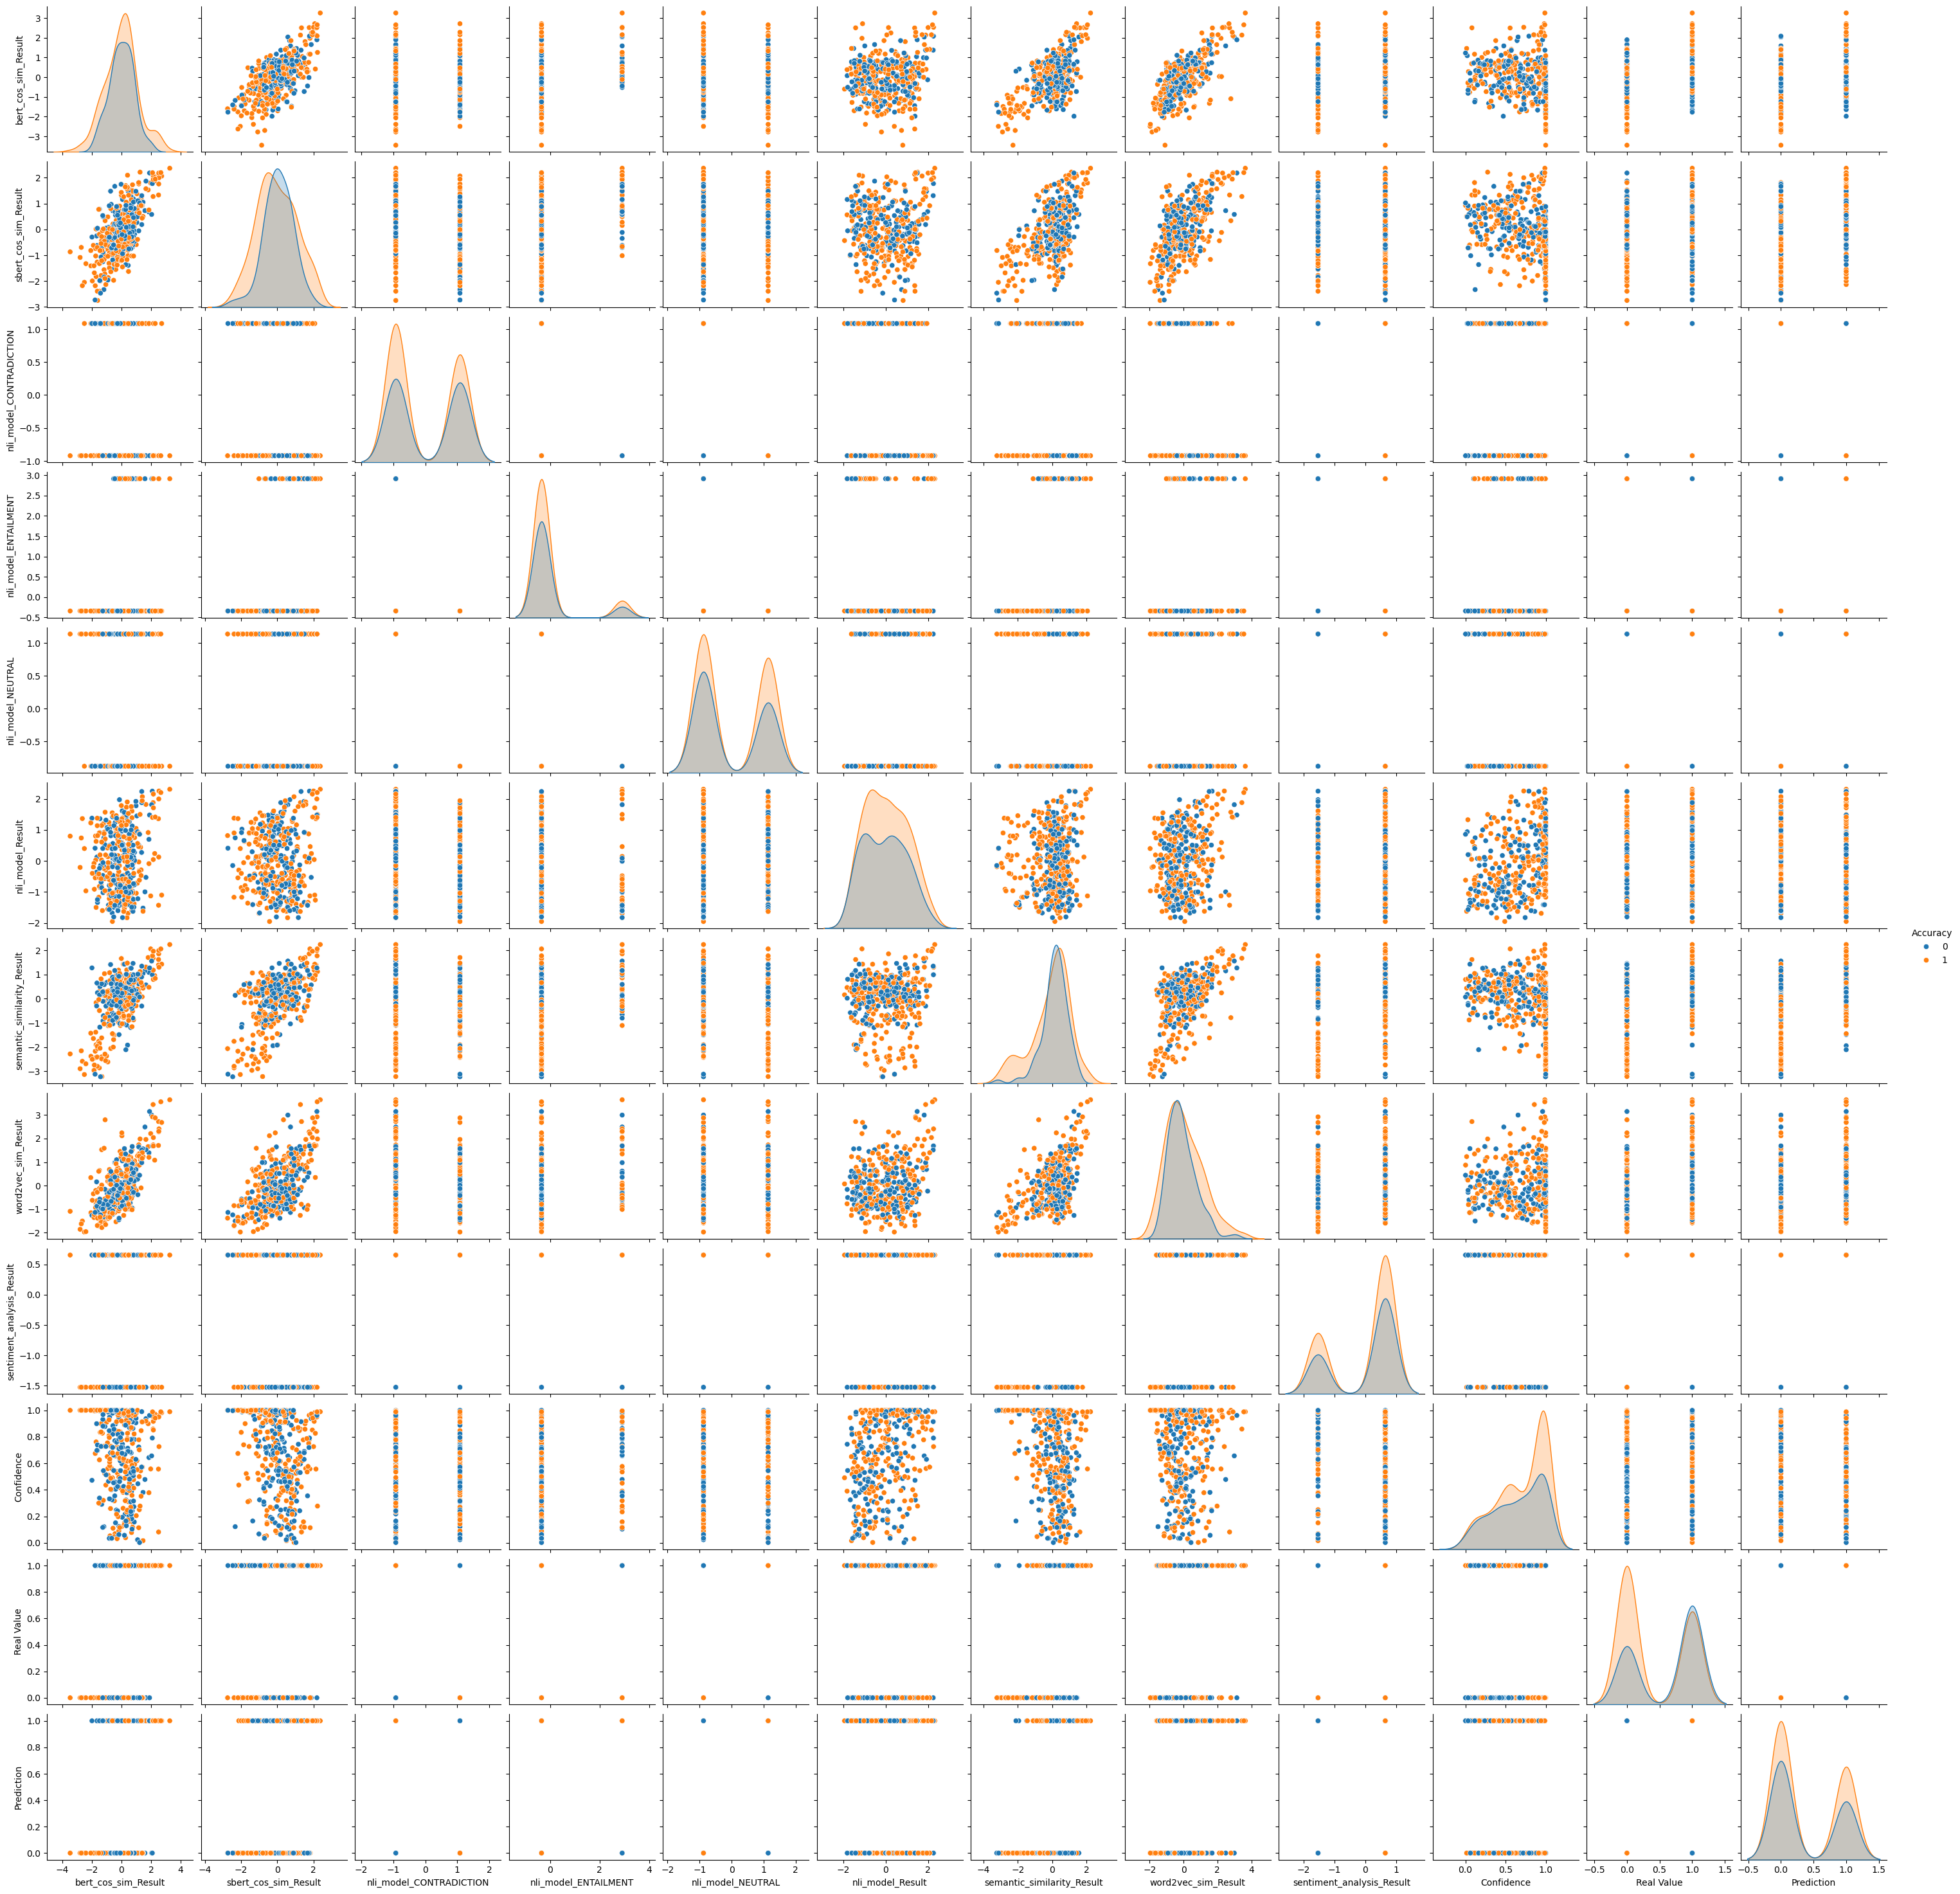

In [30]:

import seaborn as sns

fig = sns.pairplot(result_df, hue="Accuracy")
fig.savefig("Results/Result_pairplot_keras.png")